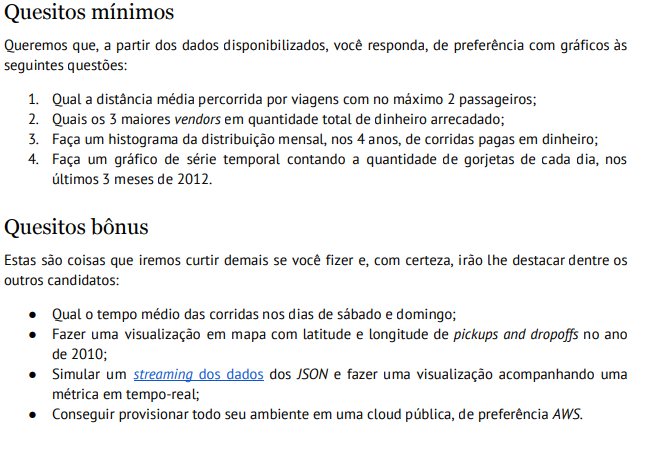

In [63]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as pyo
pyo.init_notebook_mode()

In [2]:
os.listdir('.')

['.ipynb_checkpoints',
 'data-payment_lookup.csv',
 'data-sample_data-nyctaxi-trips-2009-json_corrigido.json',
 'data-sample_data-nyctaxi-trips-2010-json_corrigido.json',
 'data-sample_data-nyctaxi-trips-2011-json_corrigido.json',
 'data-sample_data-nyctaxi-trips-2012-json_corrigido.json',
 'data-vendor_lookup.csv',
 'Untitled.ipynb']

In [3]:
data_payment = pd.read_csv('data-payment_lookup.csv')

In [4]:
data_payment

A               B
0     payment_type  payment_lookup
1              Cas            Cash
2              CAS            Cash
3              Cre          Credit
4              CRE          Credit
...            ...             ...
3284          3267             Foo
3285          3268             Foo
3286          3269             Foo
3287          3270             Foo
3288          3271             Foo

[3289 rows x 2 columns]

In [5]:
data_vendor = pd.read_csv('data-vendor_lookup.csv')

In [6]:
data_vendor

vendor_id                               name                   address  \
0       CMT  Creative Mobile Technologies, LLC     950 4th Road Suite 78   
1       VTS                       VeriFone Inc             26 Summit St.   
2       DDS     Dependable Driver Service, Inc  8554 North Homestead St.   
3        TS                 Total Solutions Co    Five Boroughs Taxi Co.   
4        MT                          Mega Taxi       4 East Jennings St.   

       city state    zip country                 contact current  
0  Brooklyn    NY  11210     USA    contactCMT@gmail.com     Yes  
1  Flushing    NY  11354     USA       admin@vtstaxi.com     Yes  
2     Bronx    NY  10472     USA              9778896500     Yes  
3  Brooklyn    NY  11229     USA           mgmt@5btc.com     Yes  
4  Brooklyn    NY  11228     USA  contact@megataxico.com      No

In [7]:
data_trips_2009 = pd.read_json('data-sample_data-nyctaxi-trips-2009-json_corrigido.json', lines=True)

In [8]:
data_trips_2009['year'] = '2009'

In [9]:
data_trips_2010 = pd.read_json('data-sample_data-nyctaxi-trips-2010-json_corrigido.json', lines=True)

In [10]:
data_trips_2010['year'] = '2010'

In [11]:
data_trips_2011 = pd.read_json('data-sample_data-nyctaxi-trips-2011-json_corrigido.json', lines=True)

In [12]:
data_trips_2011['year'] = '2011'

In [13]:
data_trips_2012 = pd.read_json('data-sample_data-nyctaxi-trips-2012-json_corrigido.json', lines=True)

In [14]:
data_trips_2012['year'] = '2012'

In [15]:
data_trips = pd.concat([data_trips_2009,data_trips_2010,data_trips_2011,data_trips_2012])

In [16]:
data_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   vendor_id           object 
 1   pickup_datetime     object 
 2   dropoff_datetime    object 
 3   passenger_count     int64  
 4   trip_distance       float64
 5   pickup_longitude    float64
 6   pickup_latitude     float64
 7   rate_code           float64
 8   store_and_fwd_flag  float64
 9   dropoff_longitude   float64
 10  dropoff_latitude    float64
 11  payment_type        object 
 12  fare_amount         float64
 13  surcharge           float64
 14  tip_amount          float64
 15  tolls_amount        float64
 16  total_amount        float64
 17  year                object 
dtypes: float64(12), int64(1), object(5)
memory usage: 579.8+ MB


In [17]:
data_trips.head(10)

vendor_id                   pickup_datetime  \
0       CMT  2009-04-21T18:51:11.767205+00:00   
1       CMT  2009-01-13T07:40:07.639754+00:00   
2       VTS  2009-01-06T19:30:44.142187+00:00   
3       VTS  2009-09-24T08:28:09.004451+00:00   
4       VTS  2009-10-29T05:50:39.214629+00:00   
5       VTS  2009-10-23T17:14:45.661393+00:00   
6       VTS  2009-03-30T09:41:23.359373+00:00   
7       VTS  2009-03-18T17:56:30.217996+00:00   
8       VTS  2009-03-30T13:21:23.577454+00:00   
9       VTS  2009-02-20T18:06:37.232527+00:00   

                   dropoff_datetime  passenger_count  trip_distance  \
0  2009-04-21T18:57:09.433767+00:00                2           0.80   
1  2009-01-13T07:50:36.386011+00:00                1           5.40   
2  2009-01-06T19:43:09.908429+00:00                5           1.67   
3  2009-09-24T08:41:56.739991+00:00                1           4.13   
4  2009-10-29T05:57:22.880174+00:00                1           2.03   
5  2009-10-23T17:23:51.913687+00:00                1           1.15   
6  2009-03-30T09:47:12.908395+00:00                1           8.61   
7  2009-03-18T18:02:40.735727+00:00                5           0.84   
8  2009-03-30T13:32:11.850561+00:00                2           1.04   
9  2009-02-20T18:11:48.973565+00:00                5           0.75   

   pickup_longitude  pickup_latitude  rate_code  store_and_fwd_flag  \
0        -74.004114        40.742950        NaN                 NaN   
1        -73.996506        40.747784        NaN                 NaN   
2        -73.951340        40.752070        NaN                 NaN   
3        -74.001117        40.729128        NaN                 NaN   
4        -73.976600        40.756873        NaN                 NaN   
5        -73.994665        40.750528        NaN                 NaN   
6        -73.955462        40.772843        NaN                 NaN   
7        -73.976158        40.757998        NaN                 NaN   
8        -73.988585        40.764408        NaN                 NaN   
9        -74.001978        40.740683        NaN                 NaN   

   dropoff_longitude  dropoff_latitude payment_type  fare_amount  surcharge  \
0         -73.994712         40.747950         Cash          5.4        0.0   
1         -73.940449         40.792385         Cash         15.4        0.0   
2         -73.944535         40.768108         CASH          6.1        1.0   
3         -73.958122         40.721812         CASH         12.9        0.5   
4         -73.979757         40.776075         CASH          7.7        0.5   
5         -73.978623         40.750478         CASH          6.5        0.0   
6         -73.870838         40.774042         CASH         22.1        0.0   
7         -73.985112         40.759317       Credit          5.7        0.0   
8         -73.975072         40.761585         CASH          6.1        0.0   
9         -73.993722         40.747330         CASH          3.7        0.0   

   tip_amount  tolls_amount  total_amount  year  
0         0.0          0.00          5.40  2009  
1         0.0          0.00         15.40  2009  
2         0.0          0.00          7.10  2009  
3         0.0          0.00         13.40  2009  
4         0.0          0.00          8.20  2009  
5         0.0          0.00          6.50  2009  
6         0.0          4.15         26.25  2009  
7         2.0          0.00          7.70  2009  
8         0.0          0.00          6.10  2009  
9         0.0          0.00          3.70  2009

# QUESITO 1 Qual a distância média percorrida por viagens com no máximo 2 passageiros;

# RESPOSTA: ~2.66 KM

In [18]:
data_trips[data_trips.passenger_count <= 2].trip_distance.mean()

2.6625269962032174

# QUESITO 2 Quais os 3 maiores vendors em quantidade total de dinheiro arrecadado;

# RESPOSTA: 

# TOP 1: CMT 19549084.28 USD
# TOP 2: VTS  19043434.00 USD
# TOP 3: DDS   2714901.72 USD

In [19]:
topvendors = {}
for i in data_trips.vendor_id.unique().tolist():
    topvendors[i] = data_trips[data_trips.vendor_id == i].total_amount.sum()
topvendors = pd.DataFrame([topvendors]).transpose().reset_index()
topvendors.columns = ['vendor', 'total_amount']

In [20]:
px.bar(topvendors, x='vendor', y='total_amount', color = 'vendor', color_discrete_sequence = ['red','green','blue','yellow'])

# QUESITO 3 Faça um histograma da distribuição mensal, nos 4 anos, de corridas pagas em dinheiro;

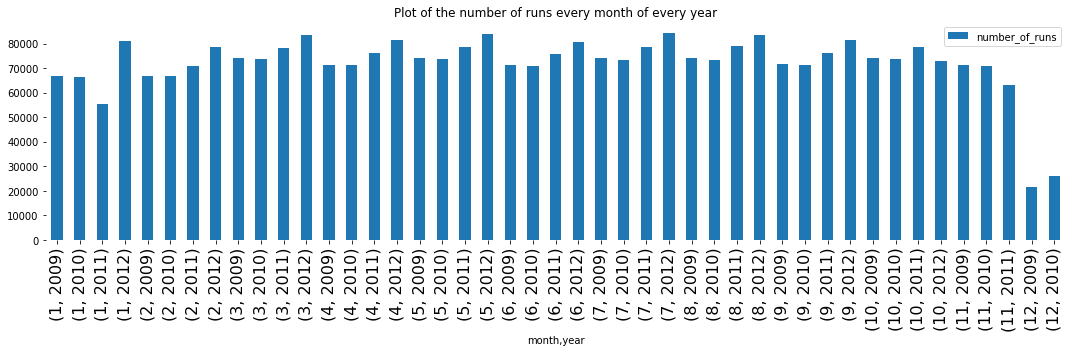

In [21]:
data_trips[data_trips.payment_type.str.lower() == 'cash']

vendor_id                   pickup_datetime  \
0            CMT  2009-04-21T18:51:11.767205+00:00   
1            CMT  2009-01-13T07:40:07.639754+00:00   
2            VTS  2009-01-06T19:30:44.142187+00:00   
3            VTS  2009-09-24T08:28:09.004451+00:00   
4            VTS  2009-10-29T05:50:39.214629+00:00   
...          ...                               ...   
999994       CMT  2012-05-20T11:18:32.272757+00:00   
999995       CMT   2012-07-02T02:16:07.72331+00:00   
999996       CMT  2012-04-11T16:24:49.255035+00:00   
999997       CMT   2012-09-15T15:00:58.80813+00:00   
999999       CMT  2012-08-24T07:25:13.503063+00:00   

                        dropoff_datetime  passenger_count  trip_distance  \
0       2009-04-21T18:57:09.433767+00:00                2           0.80   
1       2009-01-13T07:50:36.386011+00:00                1           5.40   
2       2009-01-06T19:43:09.908429+00:00                5           1.67   
3       2009-09-24T08:41:56.739991+00:00                1           4.13   
4       2009-10-29T05:57:22.880174+00:00                1           2.03   
...                                  ...              ...            ...   
999994  2012-05-20T11:23:52.285499+00:00                2           1.60   
999995   2012-07-02T02:24:36.05472+00:00                3           6.30   
999996  2012-04-11T16:30:46.179091+00:00                1           1.80   
999997  2012-09-15T15:08:10.313917+00:00                4           2.90   
999999  2012-08-24T07:38:33.870016+00:00                1           2.00   

        pickup_longitude  pickup_latitude  rate_code  store_and_fwd_flag  \
0             -74.004114        40.742950        NaN                 NaN   
1             -73.996506        40.747784        NaN                 NaN   
2             -73.951340        40.752070        NaN                 NaN   
3             -74.001117        40.729128        NaN                 NaN   
4             -73.976600        40.756873        NaN                 NaN   
...                  ...              ...        ...                 ...   
999994        -73.988602        40.737280        NaN                 NaN   
999995        -73.947063        40.784441        NaN                 NaN   
999996          0.000000         0.000000        NaN                 NaN   
999997        -74.006156        40.743763        NaN                 NaN   
999999        -73.988829        40.731162        NaN                 NaN   

        dropoff_longitude  dropoff_latitude payment_type  fare_amount  \
0              -73.994712         40.747950         Cash          5.4   
1              -73.940449         40.792385         Cash         15.4   
2              -73.944535         40.768108         CASH          6.1   
3              -73.958122         40.721812         CASH         12.9   
4              -73.979757         40.776075         CASH          7.7   
...                   ...               ...          ...          ...   
999994         -73.987888         40.721065         Cash          6.5   
999995         -73.987610         40.738477         Cash         19.4   
999996           0.000000          0.000000         Cash          7.4   
999997         -73.974005         40.764069         Cash         10.6   
999999         -74.009790         40.710155         Cash          7.8   

        surcharge  tip_amount  tolls_amount  total_amount  year  
0             0.0         0.0           0.0           5.4  2009  
1             0.0         0.0           0.0          15.4  2009  
2             1.0         0.0           0.0           7.1  2009  
3             0.5         0.0           0.0          13.4  2009  
4             0.5         0.0           0.0           8.2  2009  
...           ...         ...           ...           ...   ...  
999994        0.0         0.0           0.0           6.5  2012  
999995        0.0         0.0           0.0          19.4  2012  
999996        0.0         0.0           0.0           7.4  20

In [22]:
data_trips.pickup_datetime = pd.to_datetime(data_trips.pickup_datetime)

In [23]:
data_trips.dropoff_datetime = pd.to_datetime(data_trips.dropoff_datetime)

In [24]:
data_trips_cash = data_trips[data_trips.payment_type.str.lower() == 'cash']

In [25]:
month_runs = pd.DataFrame([data_trips_cash.pickup_datetime.groupby([data_trips_cash.pickup_datetime.dt.month, data_trips_cash.pickup_datetime.dt.year]).count()]).transpose()

In [26]:
month_runs_total = pd.DataFrame([data_trips_cash.pickup_datetime.groupby([data_trips_cash.pickup_datetime.dt.month]).count()]).transpose().reset_index(drop=True).reset_index()

In [27]:
month_runs_total.columns = ['month', 'number_of_runs']

In [28]:
px.bar(month_runs_total, x='month', y='number_of_runs', color = 'number_of_runs', color_discrete_sequence=px.colors.qualitative.G10, title='plot of the number of runs month by month of all years summed')

In [29]:
month_runs.index.set_names(['month','year'], inplace=True)

In [30]:
month_runs.columns = ['number_of_runs']

<Figure size 432x288 with 0 Axes>

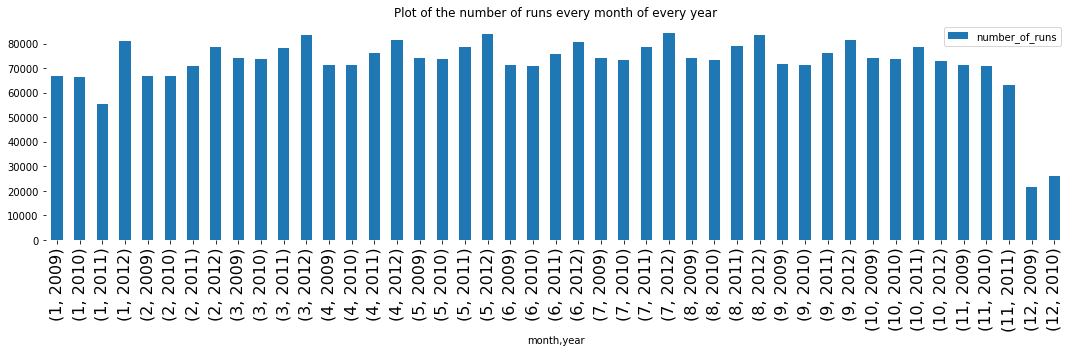

In [31]:
plt.figure()
ax = month_runs.plot(kind='bar', width = 0.5, figsize = (15,5))
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 16)
plt.title('Plot of the number of runs every month of every year')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [32]:
col0 = month_runs.iloc[:, 0]

#  QUESITO 4 Faça um gráfico de série temporal contando a quantidade de gorjetas de cada dia, nos últimos 3 meses de 2012.

# RESPOSTA:
## Como nos últimos 3 meses de 2012, só tivemos corridas em Outubro, o gráfico é o seguinte:

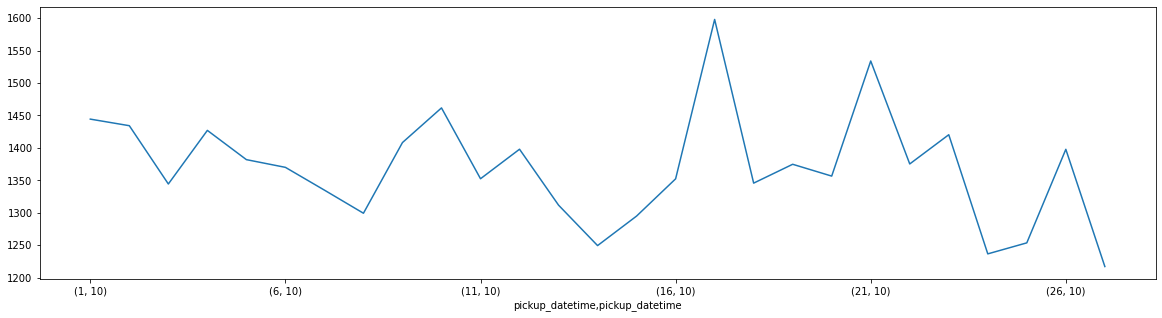

In [33]:
data_trips.head(20)

vendor_id                  pickup_datetime  \
0        CMT 2009-04-21 18:51:11.767205+00:00   
1        CMT 2009-01-13 07:40:07.639754+00:00   
2        VTS 2009-01-06 19:30:44.142187+00:00   
3        VTS 2009-09-24 08:28:09.004451+00:00   
4        VTS 2009-10-29 05:50:39.214629+00:00   
5        VTS 2009-10-23 17:14:45.661393+00:00   
6        VTS 2009-03-30 09:41:23.359373+00:00   
7        VTS 2009-03-18 17:56:30.217996+00:00   
8        VTS 2009-03-30 13:21:23.577454+00:00   
9        VTS 2009-02-20 18:06:37.232527+00:00   
10       VTS 2009-06-27 16:40:08.347535+00:00   
11       VTS 2009-03-04 21:26:51.273336+00:00   
12       VTS 2009-02-10 04:47:00.008147+00:00   
13       CMT 2009-06-23 18:24:30.175248+00:00   
14       VTS 2009-11-17 04:51:15.982618+00:00   
15       VTS 2009-02-08 06:32:17.418097+00:00   
16       VTS 2009-05-11 02:09:13.875625+00:00   
17       VTS 2009-05-22 22:21:41.345533+00:00   
18       VTS 2009-11-06 15:46:43.723758+00:00   
19       VTS 2009-02-09 04:41:54.787835+00:00   

                   dropoff_datetime  passenger_count  trip_distance  \
0  2009-04-21 18:57:09.433767+00:00                2           0.80   
1  2009-01-13 07:50:36.386011+00:00                1           5.40   
2  2009-01-06 19:43:09.908429+00:00                5           1.67   
3  2009-09-24 08:41:56.739991+00:00                1           4.13   
4  2009-10-29 05:57:22.880174+00:00                1           2.03   
5  2009-10-23 17:23:51.913687+00:00                1           1.15   
6  2009-03-30 09:47:12.908395+00:00                1           8.61   
7  2009-03-18 18:02:40.735727+00:00                5           0.84   
8  2009-03-30 13:32:11.850561+00:00                2           1.04   
9  2009-02-20 18:11:48.973565+00:00                5           0.75   
10 2009-06-27 16:51:08.733720+00:00                2           1.11   
11 2009-03-04 21:36:42.342198+00:00                1           4.02   
12 2009-02-10 04:54:11.622354+00:00                1           3.08   
13 2009-06-23 18:34:35.293226+00:00                2           5.00   
14 2009-11-17 05:00:35.697468+00:00                2           1.49   
15 2009-02-08 06:41:08.813183+00:00                5           0.62   
16 2009-05-11 02:20:47.875475+00:00                2           3.67   
17 2009-05-22 22:29:09.309794+00:00                2           0.71   
18 2009-11-06 15:57:58.472462+00:00                5           1.16   
19 2009-02-09 04:47:02.133343+00:00                1           2.08   

    pickup_longitude  pickup_latitude  rate_code  store_and_fwd_flag  \
0         -74.004114        40.742950        NaN                 NaN   
1         -73.996506        40.747784        NaN                 NaN   
2         -73.951340        40.752070        NaN                 NaN   
3         -74.001117        40.729128        NaN                 NaN   
4         -73.976600        40.756873        NaN                 NaN   
5         -73.994665        40.750528        NaN                 NaN   
6         -73.955462        40.772843        NaN                 NaN   
7         -73.976158        40.757998        NaN                 NaN   
8         -73.988585        40.764408        NaN                 NaN   
9         -74.001978        40.740683        NaN                 NaN   
10          0.000000         0.000000        NaN                 NaN   
11        -73.996177        40.686802        NaN                 NaN   
12        -74.005618        40.745608        NaN                 NaN   
13        -73.951549        40.769041        NaN                 NaN   
14        -73.979138        40.762240        NaN                 NaN   
15        -73.961112        40.768632        NaN                 NaN   
16        -74.001133        40.725397        NaN                 NaN   
17        -73.992927        40.736822        NaN                 NaN   
18        -73.988935        40.721763        NaN                 NaN   
19        -73.999820        40.761537    

In [34]:
last_trimester_2012 = data_trips[(data_trips.pickup_datetime.dt.year == 2012) & (data_trips.pickup_datetime.dt.month >= 10)]

In [35]:
tips_trimester_2012 = last_trimester_2012.tip_amount.groupby([last_trimester_2012.pickup_datetime.dt.day, last_trimester_2012.pickup_datetime.dt.month]).sum()

C:\Users\victo\AppData\Roaming\Python\Python39\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning:

FixedFormatter should only be used together with FixedLocator



<AxesSubplot:xlabel='pickup_datetime,pickup_datetime'>

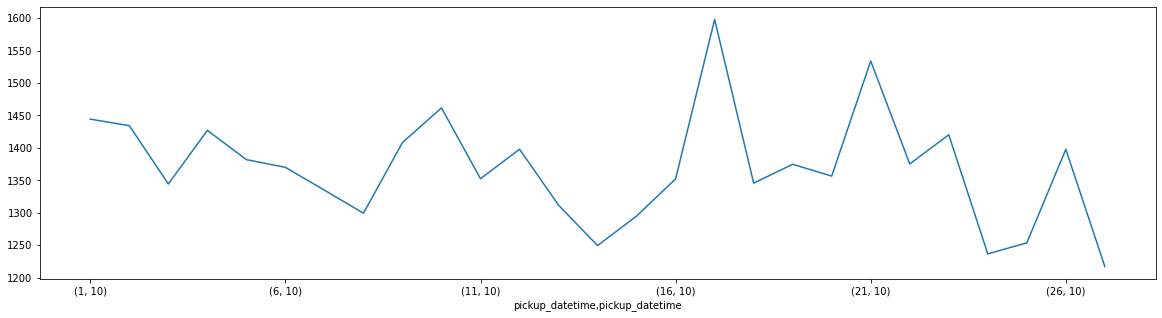

In [36]:
tips_trimester_2012.plot(kind='line', figsize=(20,5))

# QUESITO BONUS 1 Qual o tempo médio das corridas nos dias de sábado e domingo;

# RESPOSTA:
## O tempo médio das corridas nos dias de sábado e domingo é 00:08:44.790923 (aproximadamente 8 minutos e 44 segundos)

In [43]:
(data_trips[data_trips.pickup_datetime.dt.dayofweek >= 5].dropoff_datetime - data_trips[data_trips.pickup_datetime.dt.dayofweek >= 5].pickup_datetime).mean()

Timedelta('0 days 00:08:44.790923')

# QUESITO BONUS 2 Fazer uma visualização em mapa com latitude e longitude de pickups and dropoffs no ano de 2010;

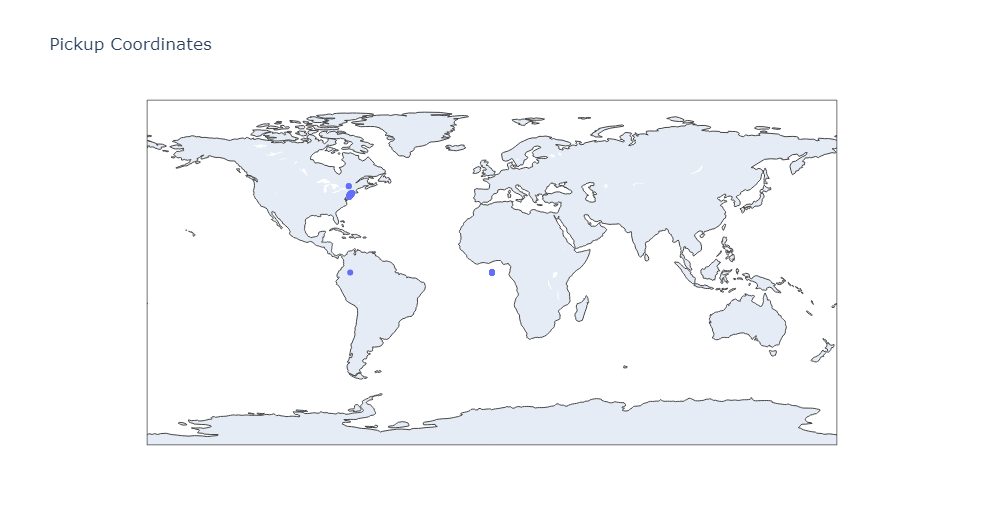




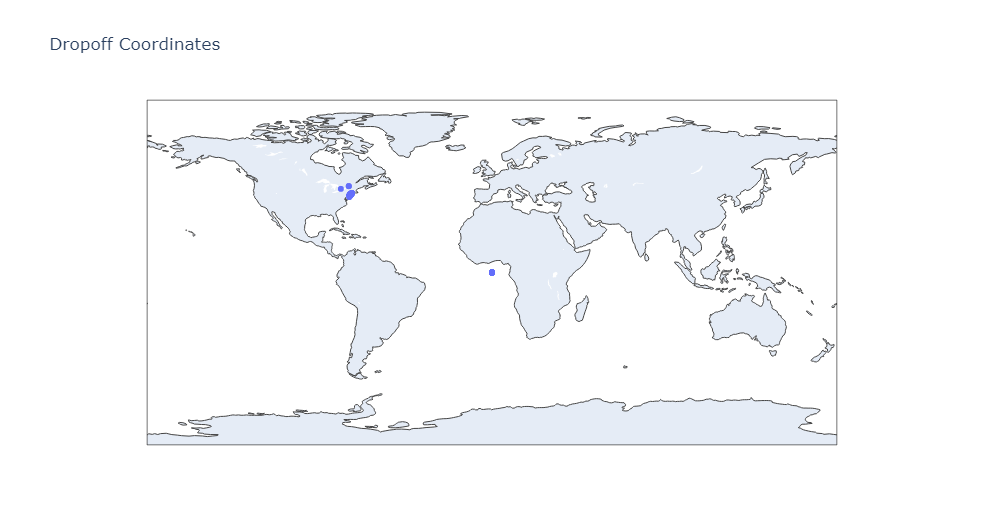

In [65]:
coordinates_pickup = data_trips[data_trips.year == '2010'][['pickup_longitude','pickup_latitude']]

In [66]:
coordinates_pickup = coordinates_pickup.sample(n=10000, random_state=10)

In [67]:
coordinates_dropoff = data_trips[data_trips.year == '2010'][['dropoff_longitude','dropoff_latitude']]

In [68]:
coordinates_dropoff = coordinates_dropoff.sample(n=10000, random_state=10)

In [79]:
fig = px.scatter_geo(coordinates_pickup,
                    lat=coordinates_pickup.pickup_latitude,
                    lon=coordinates_pickup.pickup_longitude,
                    title='Pickup Coordinates'
                    )

fig.show()

In [81]:
fig = px.scatter_geo(coordinates_dropoff,
                    lat=coordinates_dropoff.dropoff_latitude,
                    lon=coordinates_dropoff.dropoff_longitude,
                    title='Dropoff Coordinates')
fig.show()